     danceability  energy  key  speechiness  acousticness  instrumentalness  \
0           0.506   0.493    8       0.0427        0.7980          0.003550   
1           0.623   0.403    5       0.0426        0.4510          0.000011   
2           0.654   0.334    8       0.0521        0.7020          0.714000   
3           0.418   0.227    4       0.0379        0.9120          0.822000   
4           0.587   0.673   10       0.0509        0.7440          0.006180   
..            ...     ...  ...          ...           ...               ...   
175         0.878   0.619    6       0.1020        0.0533          0.000000   
176         0.760   0.479    2       0.0466        0.5560          0.000000   
177         0.831   0.502   10       0.0460        0.1010          0.000000   
178         0.769   0.787   11       0.3670        0.1890          0.000000   
179         0.597   0.733    1       0.4100        0.1340          0.000000   

     valence    tempo  Class  
0      0.584  134.77

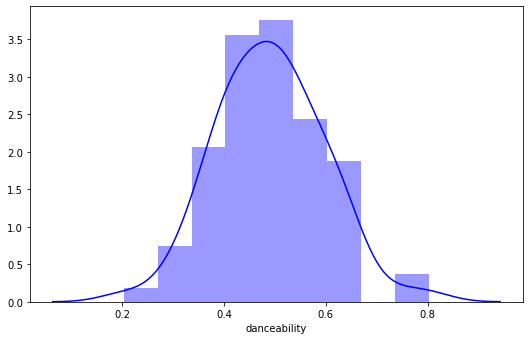

In [2]:
# Set up query
import pandas as pd
import spotipy
import matplotlib.pyplot as plt
import seaborn as sns
from spotipy.oauth2 import SpotifyClientCredentials
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV   


sp = spotipy.Spotify(
            client_credentials_manager=SpotifyClientCredentials(client_id='Insert your Client ID token here', 
                    client_secret='Insert Client Token here'))

# Custom playlist urls
url_jazz = 'spotify:playlist:37i9dQZF1DXbITWG1ZJKYt'
url_hiphop = 'spotify:playlist:6GwydhZ1ss4REIOEcEvand'
url_kpop = 'spotify:playlist:5mxD70VmFalNBWsi0XZXeg'
url_edm = 'spotify:playlist:0UNjHhsUPp9YWFwVYodNxB'


#Creates the datafiles for each playlist (Only need to be used once)
def createData():
    Jazz_id = []
    Hiphop_id = []
    Kpop_id = []
    Edm_id = []
   
    #Create 4 arrays with song ids from all the playlists
    Jazz_id = getTrackIDs(url_jazz)
    Hiphop_id = getTrackIDs(url_hiphop)
    Kpop_id = getTrackIDs(url_kpop)
    Edm_id = getTrackIDs(url_edm)
    
    Jazz_features = sp.audio_features(tracks = Jazz_id)
    Hiphop_features = sp.audio_features(tracks = Hiphop_id)
    Kpop_features = sp.audio_features(tracks = Kpop_id)
    Edm_features = sp.audio_features(tracks = Edm_id)
 
    
    danceability = []
    energy = []
    key = []
    loudness = []
    speechiness = []
    acousticness = []
    instrumental = []
    valence = []
    tempo = []
    
    danceability2= []
    energy2= []
    key2= []
    loudness2= []
    speechiness2= []
    acousticness2= []
    instrumental2= []
    valence2= []
    tempo2= []

    danceability3= []
    energy3= []
    key3= []
    loudness3= []
    speechiness3= []
    acousticness3= []
    instrumental3= []
    valence3= []
    tempo3= []
    
    danceability4= []
    energy4= []
    key4= []
    loudness4= []
    speechiness4= []
    acousticness4= []
    instrumental4= []
    valence4= []
    tempo4= []
    
    for i in range(len(Jazz_features)):

        danceability.append(Jazz_features[i]['danceability'])
        energy.append(Jazz_features[i]['energy'])
        key.append(Jazz_features[i]['key'])
        speechiness.append(Jazz_features[i]['speechiness'])
        acousticness.append(Jazz_features[i]['acousticness'])
        instrumental.append(Jazz_features[i]['instrumentalness'])
        valence.append(Jazz_features[i]['valence'])
        tempo.append(Jazz_features[i]['tempo'])
       
    
    df1 = pd.DataFrame({'danceability':danceability, 'energy': energy, 
                      'key': key, 'speechiness':speechiness, 
                      'acousticness': acousticness,
                      'instrumentalness': instrumental, 
                      'valence': valence, 'tempo': tempo})
    
    for i in range(len(Hiphop_features)):

        danceability2.append(Hiphop_features[i]['danceability'])
        energy2.append(Hiphop_features[i]['energy'])
        key2.append(Hiphop_features[i]['key'])
        speechiness2.append(Hiphop_features[i]['speechiness'])
        acousticness2.append(Hiphop_features[i]['acousticness'])
        instrumental2.append(Hiphop_features[i]['instrumentalness'])
        valence2.append(Hiphop_features[i]['valence'])
        tempo2.append(Hiphop_features[i]['tempo'])
       
    
    df2 = pd.DataFrame({'danceability':danceability2, 'energy': energy2, 
                      'key': key2, 'speechiness':speechiness2, 
                      'acousticness': acousticness2,
                      'instrumentalness': instrumental2, 
                      'valence': valence2, 'tempo': tempo2})
    
    
    
    for i in range(len(Kpop_features)):

        danceability3.append(Kpop_features[i]['danceability'])
        energy3.append(Kpop_features[i]['energy'])
        key3.append(Kpop_features[i]['key'])
        speechiness3.append(Kpop_features[i]['speechiness'])
        acousticness3.append(Kpop_features[i]['acousticness'])
        instrumental3.append(Kpop_features[i]['instrumentalness'])
        valence3.append(Kpop_features[i]['valence'])
        tempo3.append(Kpop_features[i]['tempo'])               
       
    
    df3 = pd.DataFrame({'danceability':danceability3, 'energy': energy3, 
                      'key': key3, 'speechiness':speechiness3, 
                      'acousticness': acousticness3,
                      'instrumentalness': instrumental3, 
                      'valence': valence3, 'tempo': tempo3})
    
    for i in range(len(Edm_features)):

        danceability4.append(Edm_features[i]['danceability'])
        energy4.append(Edm_features[i]['energy'])
        key4.append(Edm_features[i]['key'])
        speechiness4.append(Edm_features[i]['speechiness'])
        acousticness4.append(Edm_features[i]['acousticness'])
        instrumental4.append(Edm_features[i]['instrumentalness'])
        valence4.append(Edm_features[i]['valence'])
        tempo4.append(Edm_features[i]['tempo'])
    
    df4 = pd.DataFrame({'danceability':danceability4, 'energy': energy4, 
                      'key': key4, 'speechiness':speechiness4, 
                      'acousticness': acousticness4,
                      'instrumentalness': instrumental4, 
                      'valence': valence4, 'tempo': tempo4})
    
    
    df1.to_excel("Jazz_Features.xlsx")
    df2.to_excel("Hiphop_Features.xlsx")
    df3.to_excel("Kpop_Features.xlsx")
    df4.to_excel("Edm_Features.xlsx")
        


def plotfigures(file, c):
    df = pd.read_excel(file, index_col=0)
    
    # Start plot
    
    plt.figure(1, figsize=(30, 25))
    
    plt.subplot(4,3,1)
    sns.distplot(df["danceability"], color=c)

    plt.subplot(4,3,2)
    sns.distplot(df["energy"], color=c)

    plt.subplot(4,3,3)
    sns.distplot(df["key"], color=c)

    plt.subplot(4,3,4)
    sns.distplot(df["speechiness"], color=c)

    plt.subplot(4,3,5)
    sns.distplot(df["acousticness"], color=c)

    plt.subplot(4,3,6)
    sns.distplot(df["instrumentalness"], color=c)


    plt.subplot(4,3,7)
    sns.distplot(df["valence"], color=c)


    plt.subplot(4,3,8)
    sns.distplot(df["tempo"], color=c)




def getTracks(Playlist_url):
    tracks = sp.playlist_tracks(playlist_id = Playlist_url)['items']
   # print(tracks)
    return tracks
    
def getTrackIDs(Playlist_url):
    tracksIDs = []
    #Only grab the track ids from each playlist
    for i in range(len(getTracks(Playlist_url))):
        tracksIDs.append(getTracks(Playlist_url)[i]['track']['id'])
    return tracksIDs
    
def main():
    #createData()

  #  plotfigures("Jazz_Features.xlsx", 'blue')
   # plotfigures("Hiphop_Features.xlsx", 'green')
   # plotfigures("Kpop_Features.xlsx", 'red')
  # plotfigures("Edm_Features.xlsx", 'purple')
    
    labelled_jazz = pd.read_excel("Jazz_Features.xlsx", index_col=0, usecols=[0,1,2,3,4,5,6,7,8])
    labelled_hiphop = pd.read_excel("Hiphop_Features.xlsx", index_col=0, usecols=[0,1,2,3,4,5,6,7,8])
    labelled_kpop = pd.read_excel("Kpop_Features.xlsx", index_col=0, usecols=[0,1,2,3,4,5,6,7,8])
    labelled_edm = pd.read_excel("Edm_Features.xlsx", index_col=0, usecols=[0,1,2,3,4,5,6,7,8])

    
    labelled_jazz["Class"] = 0
    labelled_hiphop["Class"] = 1
    labelled_kpop["Class"] = 2
    labelled_edm["Class"] = 3
    

    # Combine to create a full dataframe
    full_jazzhiphop = labelled_jazz.append(labelled_hiphop, ignore_index=True)
    full_kpopedm = labelled_kpop.append(labelled_edm, ignore_index=True)
    
    
    print(full_jazzhiphop)
    print(full_kpopedm)
    full_songs = full_jazzhiphop.append(full_kpopedm, ignore_index=True)
    
    print(full_songs)
    # Scale between 0 and 1
    full_songs["key"] = (full_songs["key"] / full_songs["key"].max())
    full_songs["tempo"] = (full_songs["tempo"] / full_songs["tempo"].max())
    print(full_songs)
    print("done")
    
  
    KNeighborhoods = 5
    r_a=1
    r_b=25
    folds = 5
    songs = full_songs
    #X is the values of first 11 columns 
    #y is the target value (The one that results from X)
    X = songs.iloc[:, :-1].values
    y = songs.iloc[:, 8].values
    
    print("This is y", len(y))
    print(y)
    print('------')
    
    print("Running train_test_split...")
    #Train_Test_split splits up the data into test and training data
    #test_size determines what portion to split up data
    #Random_state=none means it will always randomize
    #setting it to a value ensures it will stay the same
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                        random_state = 0)
    #Creates a KNN classifier of k=KNeighborhoods (k neighborhoods)
    print('')
    print("Creating KNeighbors classifier...")
    neigh = KNeighborsClassifier(KNeighborhoods)
    #Fits the X_train and y_train to use.
    #Doing this makes the neigh KNN classifier retain the training
    #This lets it predict target value of X_test.
    print('')
    print("Fitting the classifier with X and y training set...")
    fitness=neigh.fit(X_train, y_train)

    #Store the predictions into a seperate matrix to determine accuracy later with .score method

    #Creates the y_prediction column based on X_test
    y_prediction = neigh.predict(X_test)
    #Accuracy of prediction from y_test
    accuracy = accuracy_score(y_test, y_prediction)
    print('')
    print("Accuracy is: ")
    print(accuracy)    

    #Cross_validation to determine accuracy through multiple train_test_splits of diff sizes
    #By default crosS_val_score will make 5 folds (or groups)
    print('')
    print("Running Cross validation score...")
    crossval = cross_val_score(neigh, X_train, y_train, cv = folds)
    
    print(crossval)
    print('')
    print("Running Grid Search CV...")
    k_range = list(range(r_a, r_b))
    print(k_range)
    
    param_grid = dict(n_neighbors=k_range)
    print(param_grid)
 

    grid = GridSearchCV(neigh, param_grid, cv=5, scoring='accuracy')
    
    grid.fit(X, y)
    print('The best score is:')
    print(grid.best_score_)
    print("The best parameters are:")
    print(grid.best_params_)

    
main()